In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

## Задание 1: Работа с массивами NumPy  

Цель: Проверить знание методов NumPy для анализа данных.  

Задание:  
1. Создайте массив случайных чисел (50 элементов) из диапазона [10, 100].  
2. Найдите:  
3. Среднее арифметическое массива.  
4. Медиану.  
5. Стандартное отклонение.  
6. Создайте новый массив, где каждое число изначального массива делится на 3. Отфильтруйте числа, которые делятся без остатка.

Ожидаемый ответ:  
- Вывод среднего, медианы, стандартного отклонения.  
- Новый массив и его фильтр.  

In [6]:
# Создаем массив из 50 чисел в диапозоне от 10 до 100
array = np.random.randint(10, 101, size=50) 
print("Созданный массив случайных чисел:")
print(array)

# Находим среднее арифмитическое
print("\nСреднее арифметическое массива:")
print(np.mean(array))

# Находим медиану
print("\nМедиана массива:")
print(np.median(array))

# Находим стандартное отклонение
print("\nСтандартное отклонение массива:")
print(np.std(array))

# Создаем новый массив, где каждое число изначального массива делится на 3
divided_by3_array = array / 3 
print("\nНовый массив:")
print(divided_by3_array)

# Фильтруем числа, которые делятся без остатка на 3
print("\nЧисла нового массива, которые делятся без остатка на 3:")
print(divided_by3_array[divided_by3_array % 3 == 0])

print("\nЧисла исходного массива, которые делятся без остатка на 3:")
print(array[array % 3 == 0])

Созданный массив случайных чисел:
[ 83  46  48  30  24 100  85  84  31  53 100  18  43  33  85  60  94  11
  86  40  49  12  20  76  70  45  90  13  79  98  99  49  97  75  63  46
  52  25  89  32  15  57  12  62  17  82  96  57  45  90]

Среднее арифметическое массива:
57.32

Медиана массива:
55.0

Стандартное отклонение массива:
28.641536271645766

Новый массив:
[27.66666667 15.33333333 16.         10.          8.         33.33333333
 28.33333333 28.         10.33333333 17.66666667 33.33333333  6.
 14.33333333 11.         28.33333333 20.         31.33333333  3.66666667
 28.66666667 13.33333333 16.33333333  4.          6.66666667 25.33333333
 23.33333333 15.         30.          4.33333333 26.33333333 32.66666667
 33.         16.33333333 32.33333333 25.         21.         15.33333333
 17.33333333  8.33333333 29.66666667 10.66666667  5.         19.
  4.         20.66666667  5.66666667 27.33333333 32.         19.
 15.         30.        ]

Числа нового массива, которые делятся без оста

## Задание 2: Анализ данных с помощью Pandas  

Цель: Проверить навыки анализа и обработки данных.  

Данные: Используйте предоставленный CSV-файл ("sales_data_large.csv"), содержащий данные о продажах с полями:  

- date (дата продаж),  
- region (регион),  
- product (продукт),  
- sales (объем продаж).

Задание:  
1. Загрузите данные из файла.  
2. Определите:  
3. Общее количество записей.  
4. Какие регионы и продукты присутствуют в данных.  
5. Подсчитайте:  
6. Общие продажи по регионам.  
7. Средний объем продаж для каждого продукта.  
8. Постройте сводную таблицу, показывающую средние продажи по регионам и продуктам.  

Ожидаемый ответ:  
- Итоги анализа данных.  
- Построенная сводная таблица.  

In [7]:
# Загружаем данные из файла
df = pd.read_csv("data/sales_data_large.csv")
df.head(5)

,date,region,product,sales
0,2024-12-01,West,Widget C,246
1,2024-12-01,South,Widget B,152
2,2024-12-01,West,Widget B,391
3,2024-12-01,West,Widget A,272
4,2024-12-01,East,Widget A,337


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     500 non-null    object
 1   region   500 non-null    object
 2   product  500 non-null    object
 3   sales    500 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [9]:
# Общее количество записей. 
df.shape[0]

500

In [10]:
# Какие регионы и продукты присутствуют в данных
print(df['region'].unique())
print(df['product'].unique())

['West' 'South' 'East' 'North']
['Widget C' 'Widget B' 'Widget A']


In [12]:
# Общие продажи по регионам
df.groupby('region')['sales'].sum().to_frame()

,sales
region,
East,29244
North,39605
South,33023
West,35171


In [13]:
# Средний объем продаж для каждого продукта.
df.groupby('product')['sales'].mean().to_frame()

,sales
product,
Widget A,275.424242
Widget B,268.331361
Widget C,278.614458


In [15]:
# Постройте сводную таблицу, показывающую средние продажи по регионам и продуктам.
summary = df.pivot_table(values='sales', index='region', columns='product', aggfunc='mean')
summary

product,Widget A,Widget B,Widget C
region,,,
East,291.464286,263.116279,271.361111
North,289.145833,238.477273,304.660000
South,277.380952,282.833333,263.722222
West,250.106383,291.550000,267.136364


## Задание 3: Очистка данных и визуализация  

Цель: Проверить умение находить и исправлять ошибки в данных, а также визуализировать их.  

Данные: Используйте предоставленный CSV-файл ("sales_cleaning_large.csv"), содержащий данные о продажах с возможными пропущенными и некорректными значениями. Поля:  
- date (дата продаж),  
- sales (объем продаж),  
- region (регион).  

Задание:  
1. Найдите и устраните ошибки в данных:  
2. Заполните пропущенные даты.  
3. Удалите отрицательные значения в столбце sales или замените их на медиану столбца.  
4. Заполните пропущенные значения в sales средним значением.  
5. Постройте график продаж по датам. Убедитесь, что даты упорядочены.  

Ожидаемый ответ:  
- Обработанный DataFrame.
- Построенный график.

In [25]:
df = pd.read_csv("data/sales_cleaning_large.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    190 non-null    object 
 1   sales   190 non-null    float64
 2   region  200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


In [26]:
df.head()

,date,sales,region
0,2024-12-01,-450.0,East
1,2024-12-01,400.0,East
2,2024-12-01,-100.0,South
3,2024-12-01,350.0,West
4,2024-12-02,400.0,South


In [28]:
# Посмотрим, сколько пропущено дат
df["date"].isnull().sum()

10

In [32]:
# преобразуем столбец 'date' в формат datetime
df["date"] = pd.to_datetime(df["date"])
# Сортируем
df = df.sort_values(by='date')

# Найдем границы диапазона дат
min_date = df["date"].min()
max_date = df["date"].max()
date_range = pd.date_range(start=min_date, end=max_date)

# Заполняем пропущенные даты случайными датами в указанном диапазоне
df["date"] = df["date"].apply(lambda x: x if pd.notnull(x) else pd.to_datetime(np.random.choice(date_range)))

In [34]:
# Проверим, что пропусков больше нет
df["date"].isnull().sum()

0

In [38]:
# Удалите отрицательные значения в столбце sales или замените их на медиану столбца.

# количество отрицательных значений до замены
df[df["sales"] < 0]['sales'].count()

89

In [39]:
# Решила заменить на медиану, поскольку лучше чтобы данные остались, а не терять 89 записей
# считаем медиану для всех положительных значений
median_for_sales = df.loc[df["sales"] > 0, "sales"].median()

In [40]:
# заменяем отрицательные значения на медиану
df['sales'] = df['sales'].apply(lambda x: median_for_sales if x < 0 else x)

In [42]:
# Проверим, что отрицтаельгых значений больше нет
df[df["sales"] < 0]['sales'].count()

0

In [43]:
# Заполните пропущенные значения в sales средним значением.

# Посмотрим количество пропусков
df["sales"].isnull().sum()

10

In [44]:
# замена на среднее
df["sales"] = df["sales"].fillna(df["sales"].mean())

In [45]:
# Проверим, что пропусков больше нет
df["sales"].isnull().sum()

0

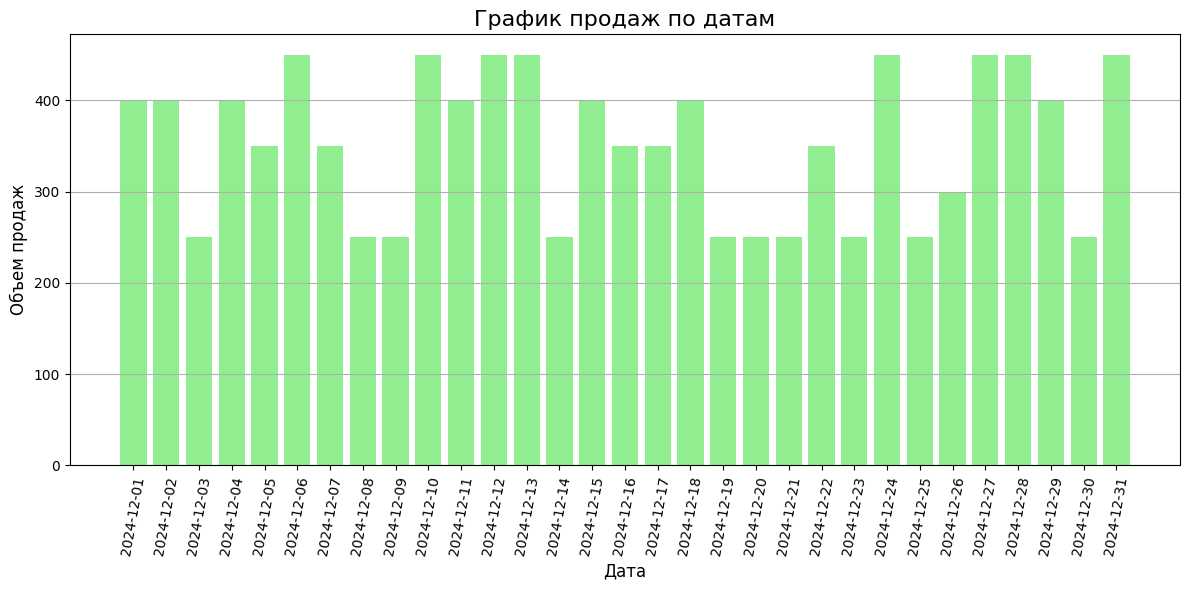

In [50]:
# Постройте график продаж по датам. Убедитесь, что даты упорядочены.
df["date"] = pd.to_datetime(df["date"])
df_sorted = df.sort_values(by="date")

plt.figure(figsize=(12, 6))
plt.bar(df_sorted["date"].dt.strftime("%Y-%m-%d"), df_sorted["sales"], color="lightgreen")
plt.title("График продаж по датам", fontsize=16)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Объем продаж", fontsize=12)
plt.xticks(rotation=80)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

## Задание 4: Получение данных из API
Цель: Проверить способность работать с веб-данными.  

Задание:  
1. Используйте открытое API (например, https://jsonplaceholder.typicode.com/users).  
2. Загрузите данные и создайте DataFrame с полями: id, name, email, company_name.  
3. Выведите таблицу с пользователями, работающими в компаниях, название которых содержит слово "Group".  

Ожидаемый ответ:  
- DataFrame с результатами фильтрации.  

In [21]:
# Загружаем данные
url = "https://jsonplaceholder.typicode.com/users"
response = requests.get(url)
if response.status_code != 200:
    print("Не удалось загрузить данные из API.")
    raise KeyboardInterrupt

data = response.json()

# Создаем DataFrame 
df = pd.DataFrame(data)
df.head()

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."


In [22]:
# Формируем DataFrame с полями: id, name, email, company_name
df = df[["id", "name", "email", "company"]]
# Делаем столбец company_name, извлекая название компании
df['company_name'] = df['company'].apply(lambda x: x['name'])
df = df.drop('company', axis=1)
    
# Фильтруем столбец "company name", название которых содержит слово "Group".
filtered = df[df['company_name'].str.contains("Group", case=False)]
    
# Вывод таблицы с результатами фильтрации
display(filtered)

,id,name,email,company_name
6,7,Kurtis Weissnat,Telly.Hoeger@billy.biz,Johns Group
7,8,Nicholas Runolfsdottir V,Sherwood@rosamond.me,Abernathy Group
